In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [3]:
df = pd.read_csv('HRDataset.csv')
df.head()

,Employee_Name,EmpID,MarriedID,MaritalStatusID,GenderID,EmpStatusID,DeptID,PerfScoreID,FromDiversityJobFairID,PayRate,...,Department,ManagerName,ManagerID,RecruitmentSource,PerformanceScore,EngagementSurvey,EmpSatisfaction,SpecialProjectsCount,LastPerformanceReview_Date,DaysLateLast30
0,"Brown, Mia",1.103024e+09,1.0,1.0,0.0,1.0,1.0,3.0,1.0,28.50,...,Admin Offices,Brandon R. LeBlanc,1.0,Diversity Job Fair,Fully Meets,2.04,2.0,6.0,1/15/2019,0.0
1,"LaRotonda, William",1.106027e+09,0.0,2.0,1.0,1.0,1.0,3.0,0.0,23.00,...,Admin Offices,Brandon R. LeBlanc,1.0,Website Banner Ads,Fully Meets,5.00,4.0,4.0,1/17/2019,0.0
2,"Steans, Tyrone",1.302053e+09,0.0,0.0,1.0,1.0,1.0,3.0,0.0,29.00,...,Admin Offices,Brandon R. LeBlanc,1.0,Internet Search,Fully Meets,3.90,5.0,5.0,1/18/2019,0.0
3,"Howard, Estelle",1.211051e+09,1.0,1.0,0.0,1.0,1.0,3.0,0.0,21.50,...,Admin Offices,Brandon R. LeBlanc,1.0,Pay Per Click - Google,Fully Meets,3.24,3.0,4.0,NaN,NaN
4,"Singh, Nan",1.307060e+09,0.0,0.0,0.0,1.0,1.0,3.0,0.0,16.56,...,Admin Offices,Brandon R. LeBlanc,1.0,Website Banner Ads,Fully Meets,5.00,3.0,5.0,1/15/2019,0.0


<Axes: >

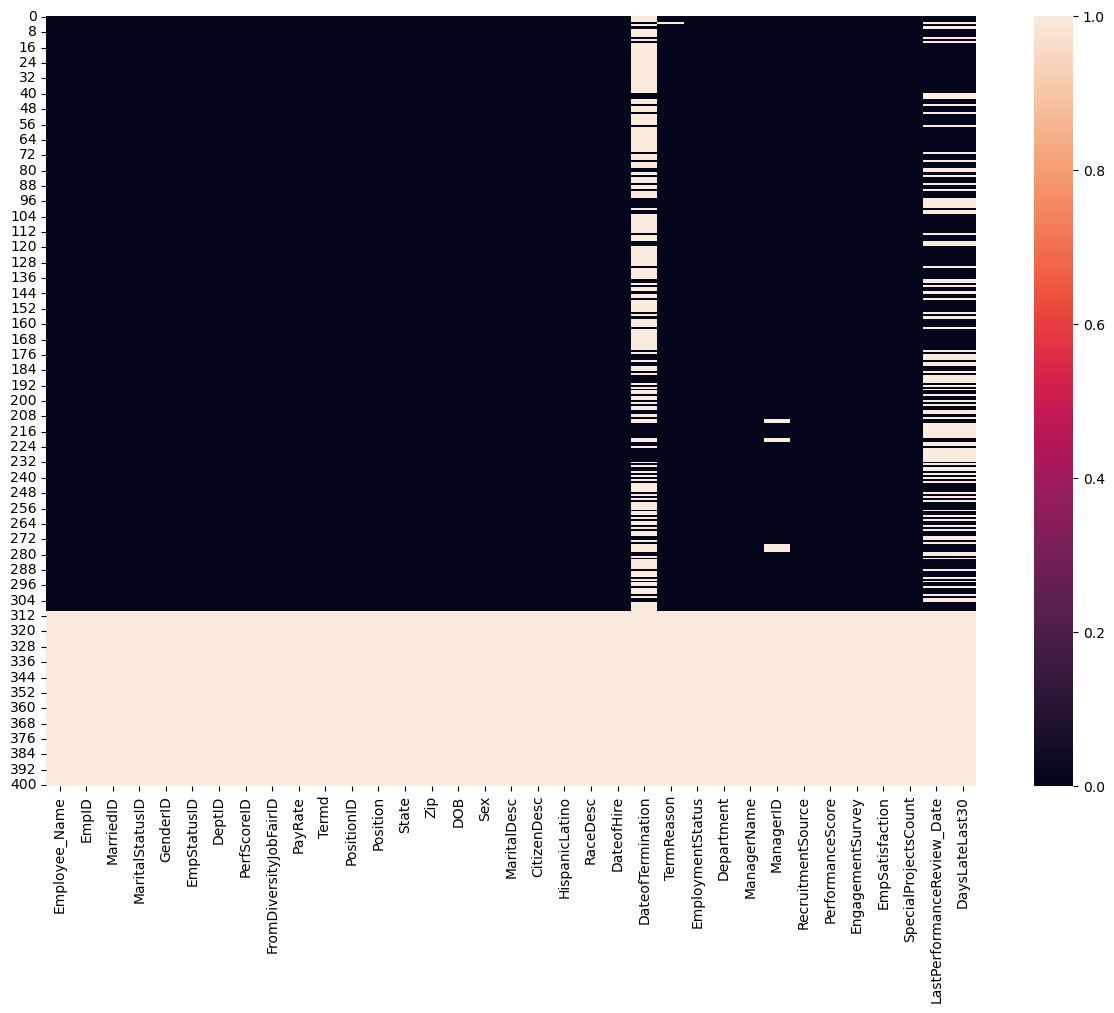

In [4]:
df.isnull()
plt.figure(figsize=(15,10))
sns.heatmap(df.isnull())

In [ ]:
PYTANIE PIERWSZE

In [5]:
df.drop(['LastPerformanceReview_Date','DaysLateLast30'],axis=1,inplace=True)

In [6]:
df.dropna(thresh=2,inplace=True)

In [7]:
df[['DateofTermination','DOB','DateofHire']].dtypes

DateofTermination    object
DOB                  object
DateofHire           object
dtype: object

In [8]:
df[['DateofTermination','DOB','DateofHire']].head()

,DateofTermination,DOB,DateofHire
0,NaN,11/24/87,10/27/2008
1,NaN,04/26/84,1/6/2014
2,NaN,09/01/86,9/29/2014
3,04/15/15,09/16/85,2/16/2015
4,NaN,05/19/88,5/1/2015


In [9]:
df['DOB'] = pd.to_datetime(df['DOB'],format='%m/%d/%y')
df['DateofTermination'] = pd.to_datetime(df['DateofTermination'],format='%m/%d/%y')
df['DateofHire'] = pd.to_datetime(df['DateofHire'],format='%m/%d/%Y')

In [10]:
df[['DateofTermination','DOB','DateofHire']].head()

,DateofTermination,DOB,DateofHire
0,NaT,1987-11-24,2008-10-27
1,NaT,1984-04-26,2014-01-06
2,NaT,1986-09-01,2014-09-29
3,2015-04-15,1985-09-16,2015-02-16
4,NaT,1988-05-19,2015-05-01


ANALIZA DANYCH

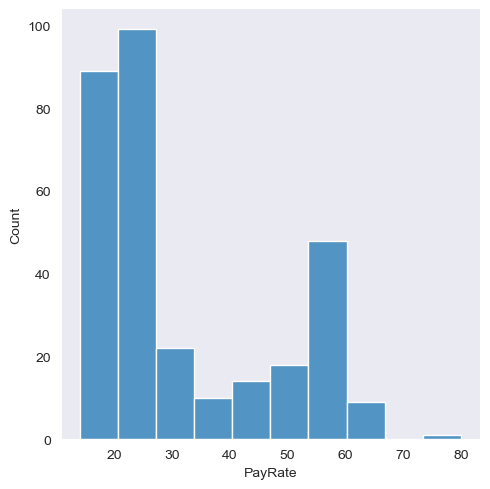

In [11]:
sns.set_style('dark')
sns.displot(df['PayRate'])

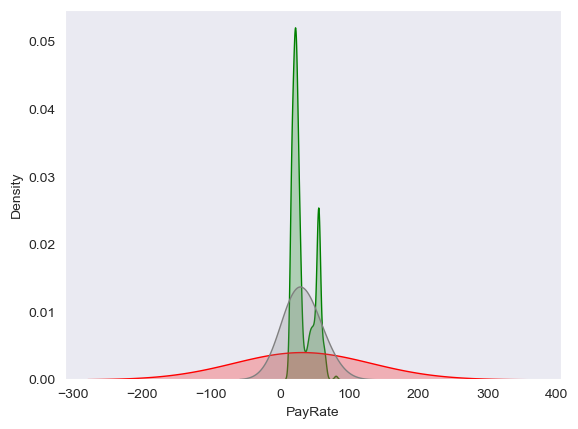

In [14]:
sns.kdeplot(df['PayRate'], fill=True, bw_adjust=0.5, color="green")
sns.kdeplot(df['PayRate'], fill=True, bw_adjust=20, color="red")
sns.kdeplot(df['PayRate'], fill=True, bw_adjust=5, color="gray")
plt.show()

In [24]:
import datetime as dt

def count_seniority(row):

    if pd.isnull(row['DateofTermination']):
        end_date = pd.Timestamp(dt.datetime(2019, 9, 27))
    else:
        end_date = row['DateofTermination']

    return (end_date - row['DateofHire']).days/365.25

In [25]:
df['Seniority'] = df.apply(lambda row: count_seniority(row),axis=1)
df[['DateofHire','DateofTermination','Seniority']].head()

,DateofHire,DateofTermination,Seniority
0,2008-10-27,NaT,10.915811
1,2014-01-06,NaT,5.722108
2,2014-09-29,NaT,4.993840
3,2015-02-16,2015-04-15,0.158795
4,2015-05-01,NaT,4.407940


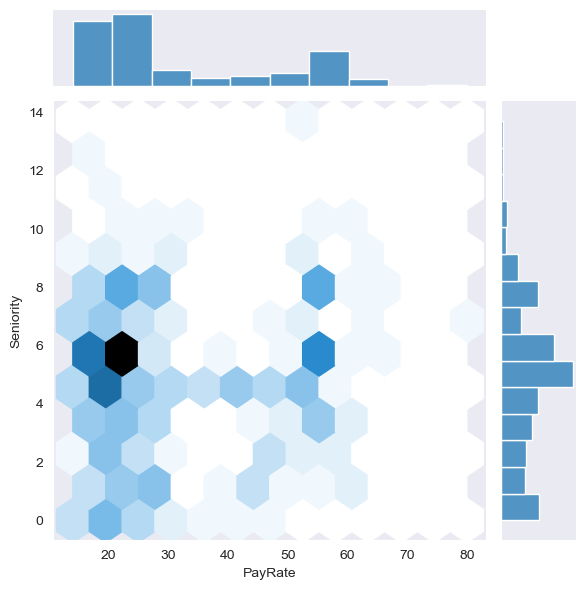

In [26]:
sns.jointplot(x='PayRate',y='Seniority',data=df,kind='hex')

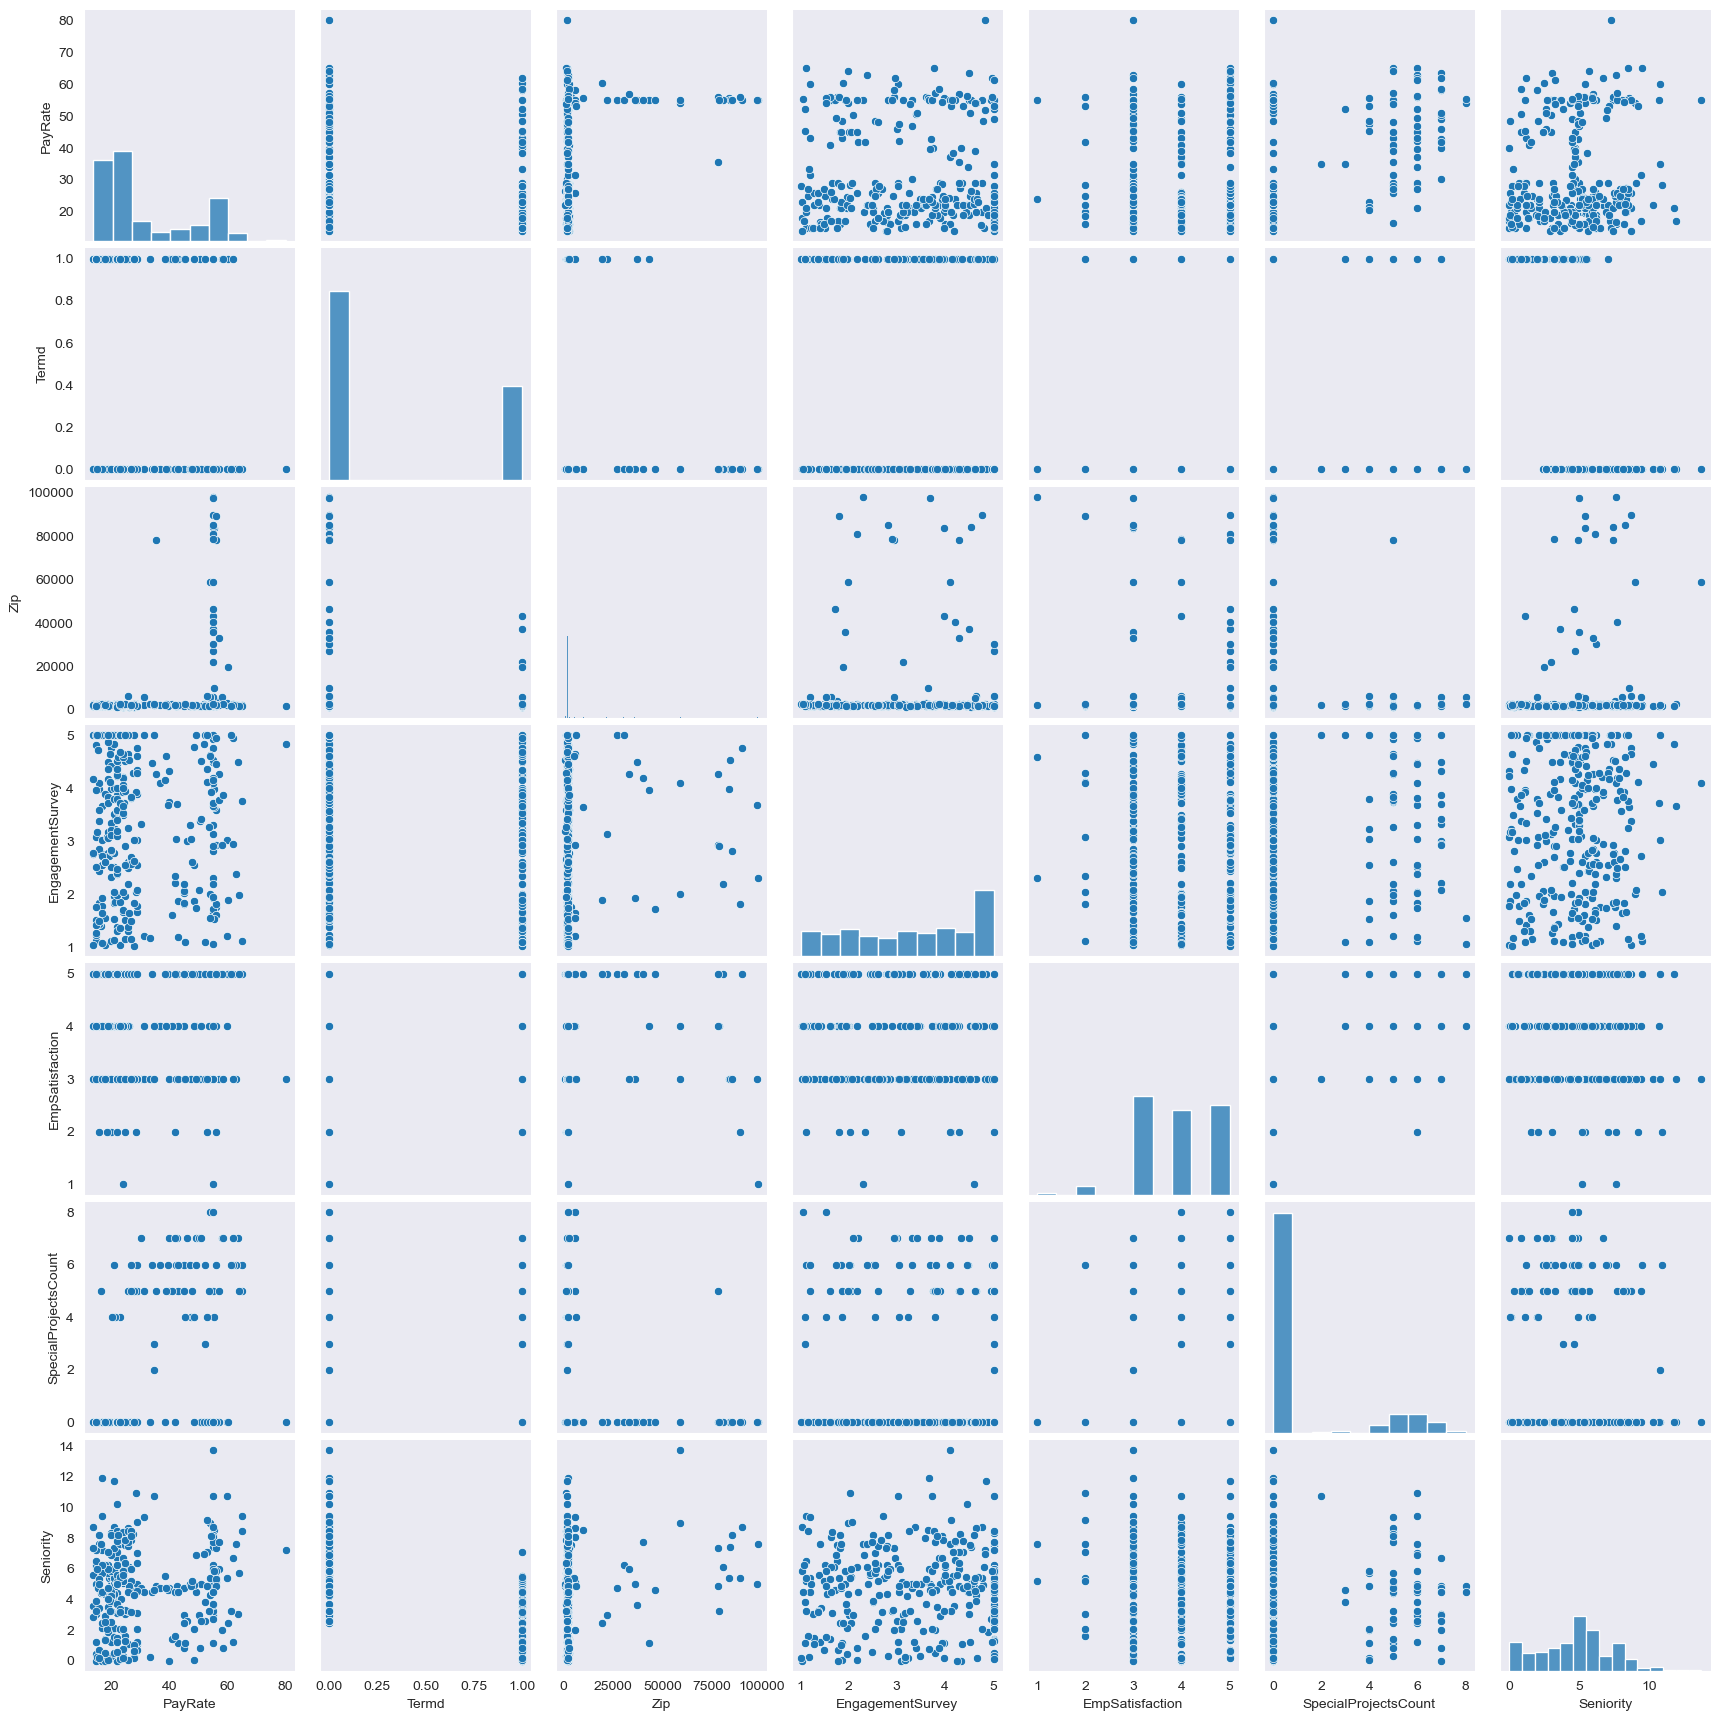

In [27]:
sns.pairplot(df[df.columns[~df.columns.str.endswith('ID')]].select_dtypes(float))

<Axes: xlabel='Department', ylabel='PayRate'>

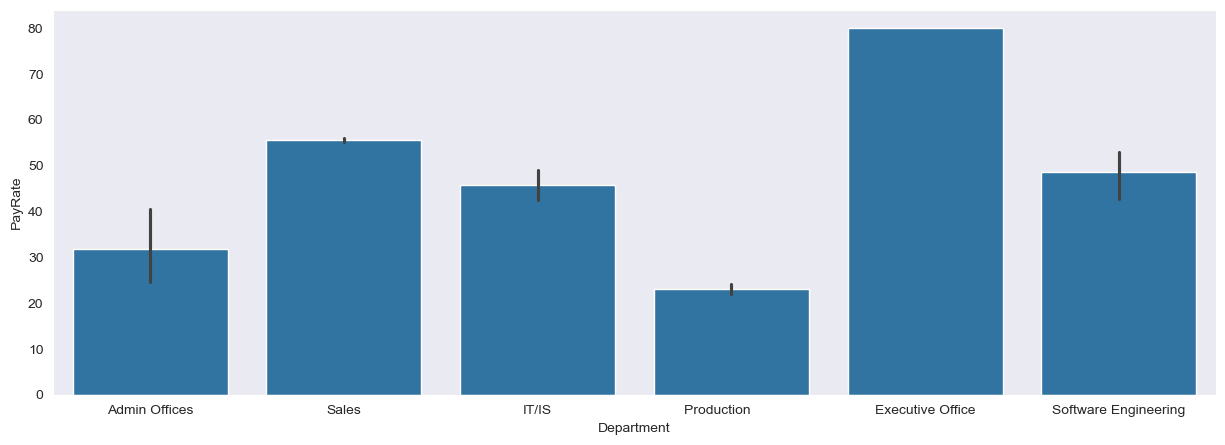

In [28]:
plt.figure(figsize=(15,5))
sns.barplot(x='Department',y='PayRate',data=df)

<Axes: xlabel='Department', ylabel='PayRate'>

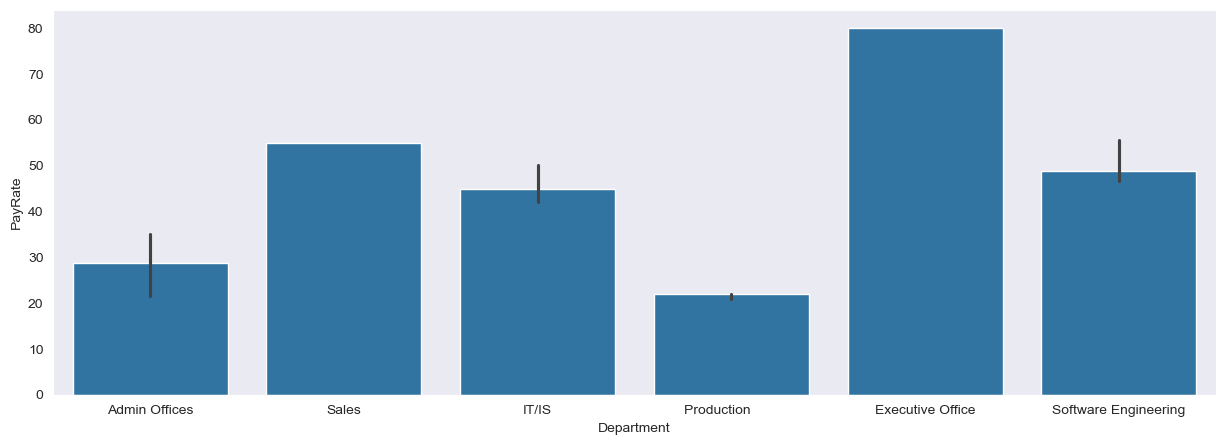

In [29]:
plt.figure(figsize=(15,5))
sns.barplot(x='Department',y='PayRate',data=df,estimator=np.median)

<Axes: xlabel='Department', ylabel='count'>

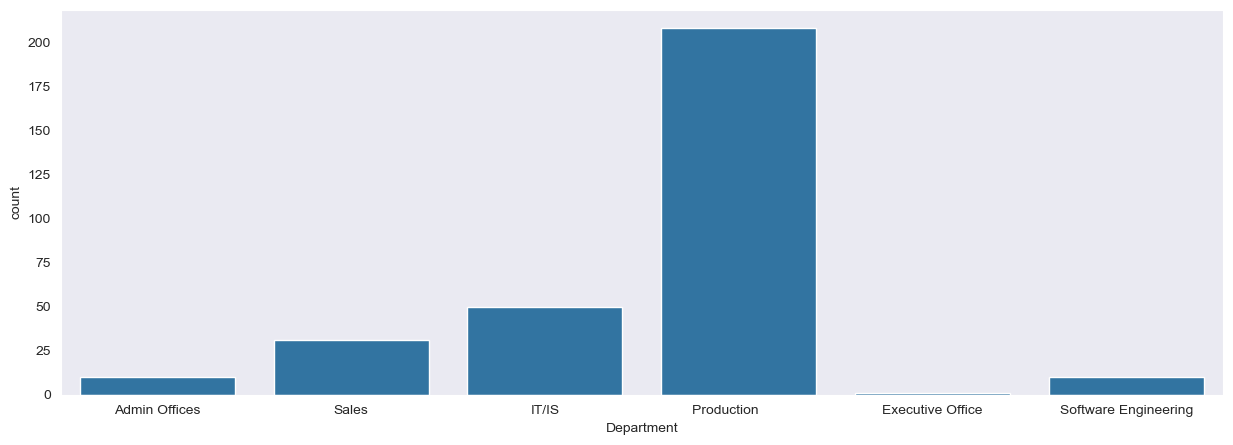

In [30]:
plt.figure(figsize=(15,5))
sns.countplot(x='Department',data=df)

<Axes: xlabel='Sex', ylabel='PayRate'>

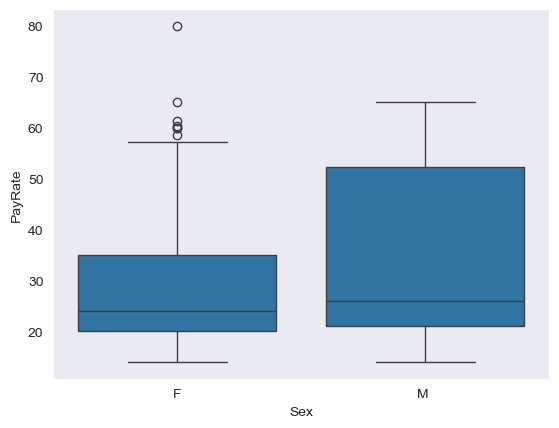

In [31]:
sns.boxplot(x='Sex',y='PayRate',data=df)

In [32]:
pd.crosstab(df['Department'],df['Sex'])

Sex,F,M
Department,,
Admin Offices,6,4
Executive Office,1,0
IT/IS,22,28
Production,127,81
Sales,15,16
Software Engineering,6,4


<Axes: xlabel='Sex', ylabel='PayRate'>

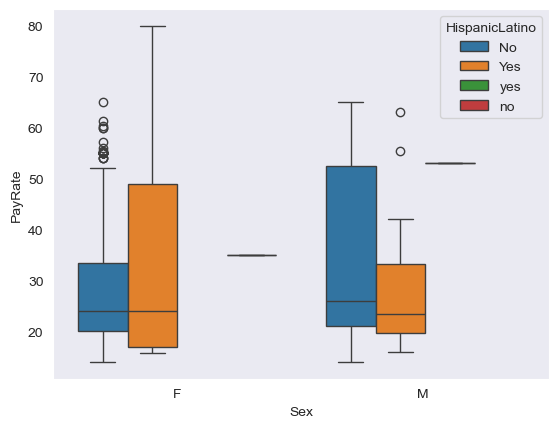

In [33]:
sns.boxplot(x='Sex',y='PayRate',data=df,hue='HispanicLatino')

In [35]:
df['HispanicLatino'] = df['HispanicLatino'].str.title()

<Axes: xlabel='Sex', ylabel='PayRate'>

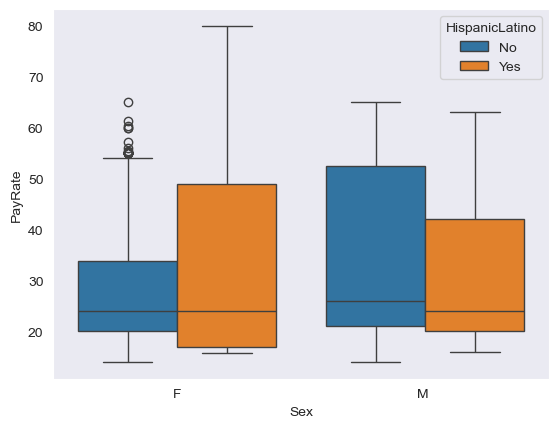

In [36]:
sns.boxplot(x='Sex',y='PayRate',data=df,hue='HispanicLatino')

<Axes: xlabel='Sex', ylabel='PayRate'>

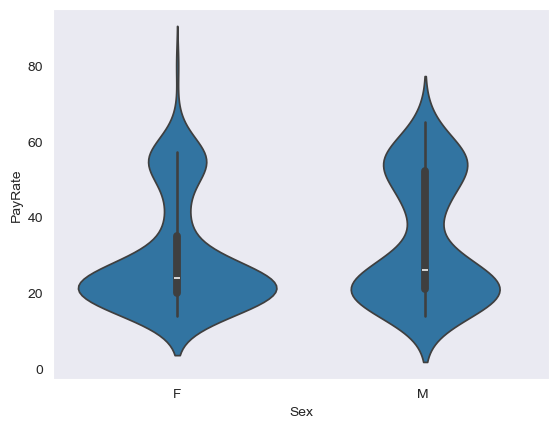

In [39]:
sns.violinplot(x='Sex',y='PayRate',data=df)

<Axes: xlabel='Sex', ylabel='PayRate'>

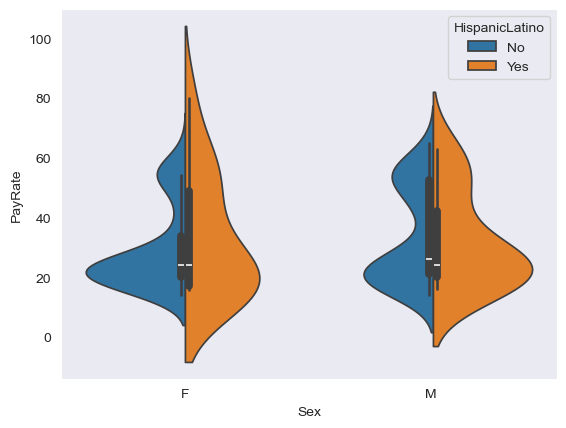

In [40]:
sns.violinplot(x='Sex',y='PayRate',data=df,hue='HispanicLatino',split=True)

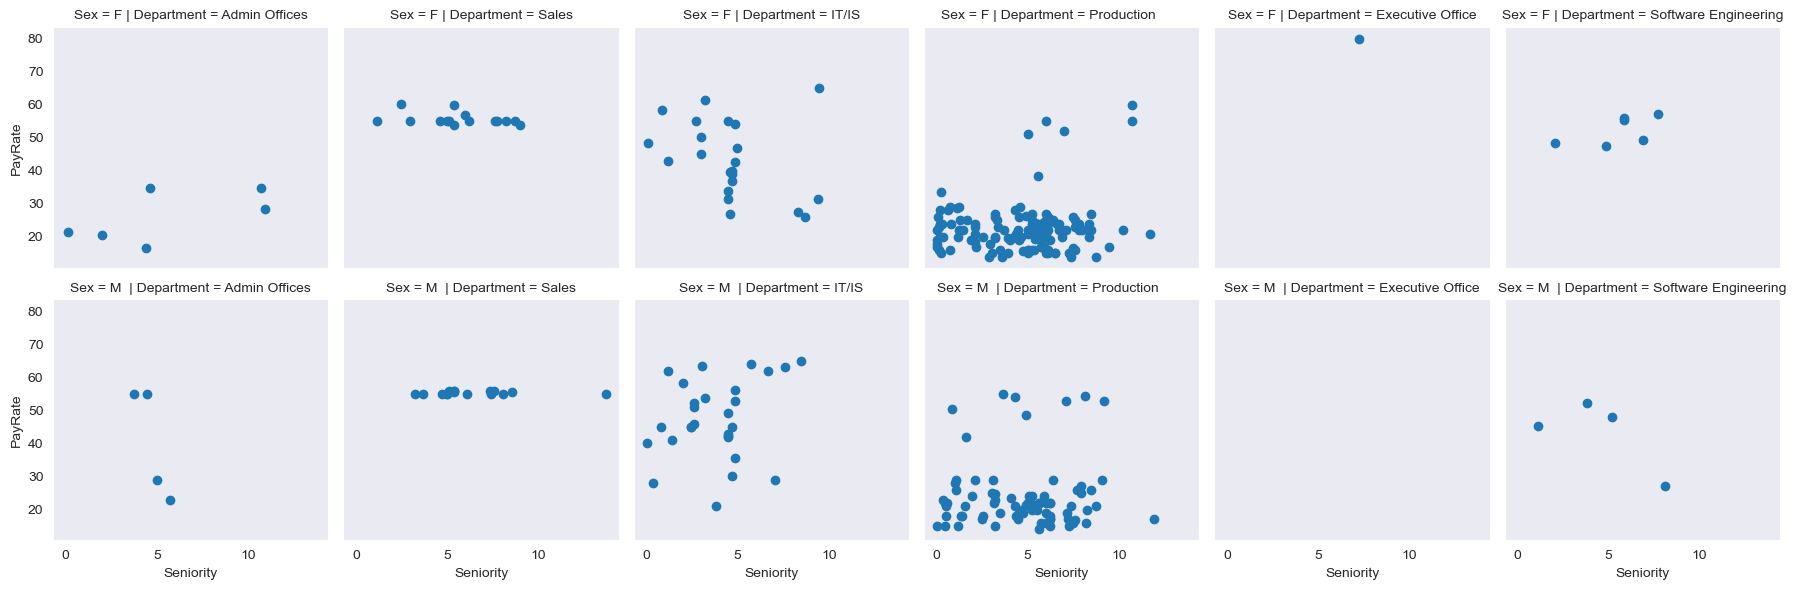

In [41]:
g = sns.FacetGrid(data=df,col='Department',row='Sex')
g.map(plt.scatter,'Seniority','PayRate')

ValueError: markers must be a singleton or a list of markers for each level of the hue variable

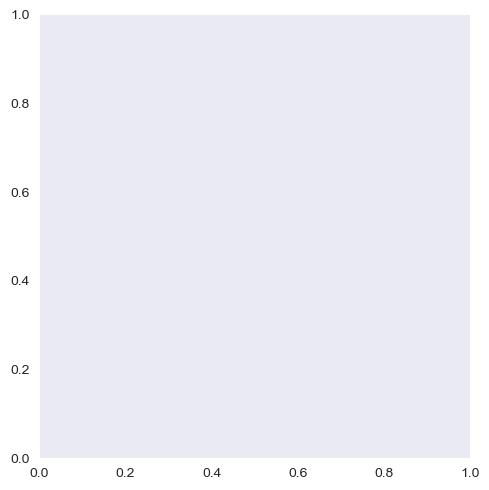

In [42]:
sns.lmplot(x='Seniority',y='PayRate',data=df[(df['Department']=='Production')],hue='Sex',markers=['o','v'],scatter_kws={'s':50})

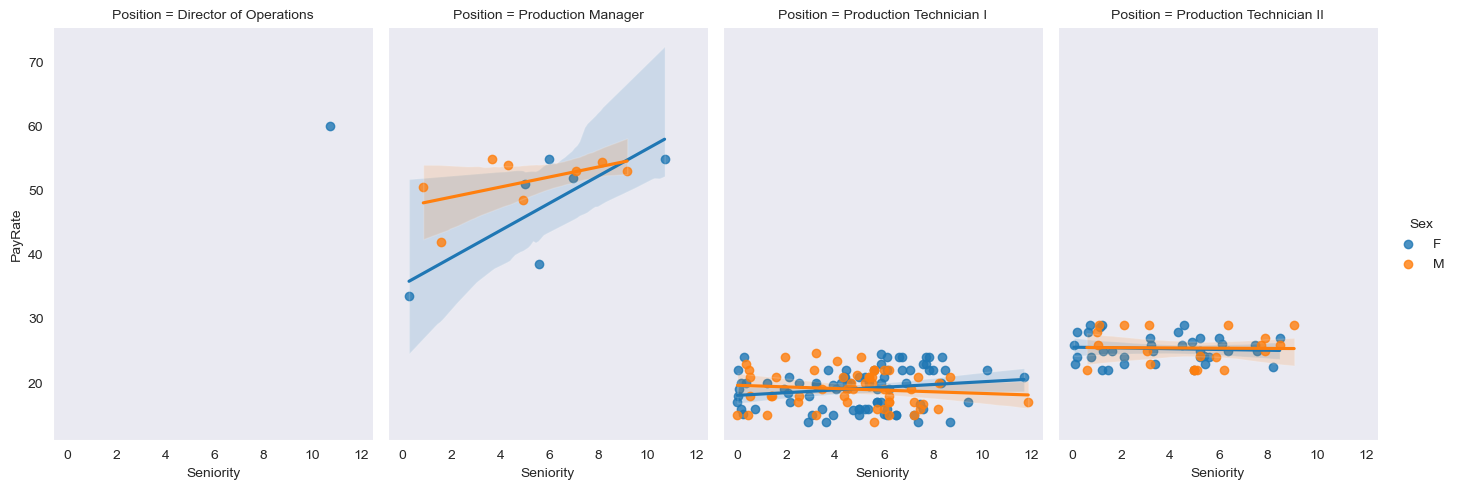

In [43]:
sns.lmplot(x='Seniority',y='PayRate',data=df[(df['Department']=='Production       ')],col='Position',hue='Sex',aspect=0.7)

In [44]:
df.pivot_table(index=df['DateofHire'].dt.month,columns=df['DateofHire'].dt.day,values='EmpID',aggfunc='count').fillna(0)

DateofHire,1,2,3,4,5,6,7,8,9,10,...,20,21,24,25,26,27,28,29,30,31
DateofHire,,,,,,,,,,,,,,,,,,,,,
1,0.0,0.0,0.0,0.0,16.0,5.0,6.0,1.0,9.0,14.0,...,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,...,4.0,5.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,2.0,0.0,2.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,12.0,3.0
4,3.0,9.0,0.0,7.0,0.0,0.0,0.0,0.0,0.0,1.0,...,2.0,0.0,0.0,0.0,2.0,1.0,0.0,0.0,1.0,0.0
5,2.0,1.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
6,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,2.0,0.0
7,0.0,3.0,0.0,1.0,11.0,4.0,9.0,9.0,1.0,0.0,...,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
8,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0
9,0.0,1.0,0.0,0.0,1.0,2.0,0.0,0.0,0.0,0.0,...,0.0,0.0,3.0,0.0,9.0,1.0,0.0,11.0,10.0,0.0


<Axes: xlabel='DateofHire', ylabel='DateofHire'>

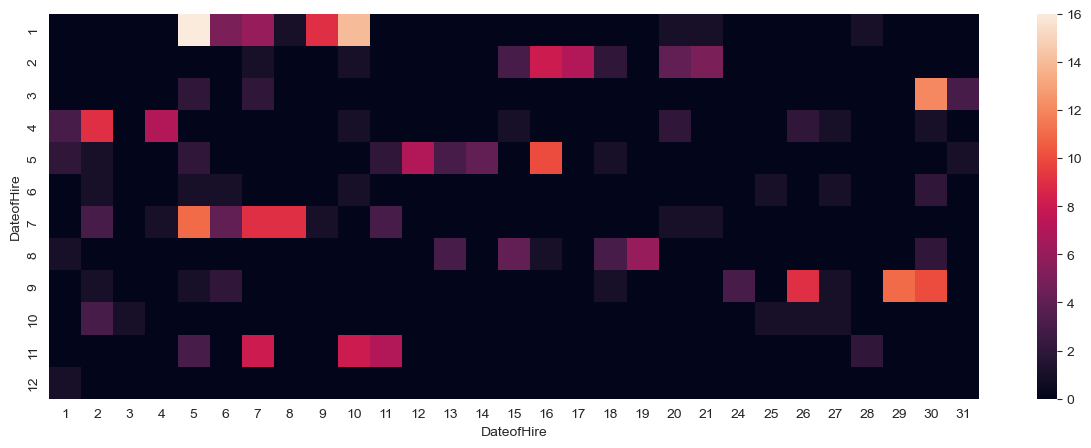

In [45]:
plt.figure(figsize=(15,5))
sns.heatmap(df.pivot_table(index=df['DateofHire'].dt.month,columns=df['DateofHire'].dt.day,values='EmpID',aggfunc='count').fillna(0))